# Dissipative Driven Duffing Oscillator

### From: Friedman et. al, arXiv:1703.04844

In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
%matplotlib inline

## Hamiltonian

$$
\frac{H}{\hbar\omega_{a}} = a^{\dagger}a+\frac{\gamma}{16}\left(a+a^{\dagger}\right)^{4}-\frac{A}{\sqrt{2}}\cos(\omega_{d}~t)(a+a^{\dagger})
$$

In [2]:
# Model parameters
gamma_n = 0.05   # Duffing term
omegad = 1.09    # driving frequency
A = 0.092        # driving strength
kappa = 0.01     # Decay rate 0.01
n_th_a = 0.0     # Thermal occupation of bath
N = 50           # fock state basis

## Hamiltonian terms

In [3]:
a  = qt.destroy(N)
H0 = a.dag() * a + (gamma_n/16) * (a + a.dag())**4
H1 = -1*(a + a.dag())

## Time-Dependence as Python function

In [4]:
H1_coeff = lambda t, *args: A/np.sqrt(2)*np.cos(omegad * t)
H_func = [H0, [H1,H1_coeff]]

## Time-Dependence as String w/o args

In [6]:
H1_coeff = "{A}/sqrt(2)*cos({omegad} * t)".format(A=A,omegad=omegad)
H_str = [H0,[H1,H1_coeff]]
H1_coeff

'0.092/sqrt(2)*cos(1.09 * t)'

## Time-Dependence as String with args

In [7]:
H1_coeff = "A/sqrt(2)*cos(omegad * t)"
H_str_args = [H0,[H1,H1_coeff]]
args = {'A':A, 'omegad':omegad}

## Build collapse operators

In [8]:
# collapse operators
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + n_th_a)) * a)  # decay operators
c_ops.append(np.sqrt(kappa*n_th_a) * a.dag())  # excitation operators

## Run Simulation

In [9]:
# initial state
rho0 = qt.fock_dm(N,0)

In [10]:
maxtime = 70 # Specified in periods of the driver 
tres = 50 # Specified in terms of the drive period
tlist = np.linspace(0, maxtime*(2*np.pi/omegad), tres*maxtime+1) # maxtime and t resolution 

### Run Using Python Function

In [11]:
# evolve returning state vectors
result = qt.mesolve(H_func, rho0, tlist, c_ops, [], progress_bar=True) 

10.0%. Run time:   5.33s. Est. time left: 00:00:00:47
20.0%. Run time:  12.42s. Est. time left: 00:00:00:49
30.0%. Run time:  18.76s. Est. time left: 00:00:00:43
40.0%. Run time:  24.87s. Est. time left: 00:00:00:37
50.0%. Run time:  31.00s. Est. time left: 00:00:00:30
60.0%. Run time:  37.11s. Est. time left: 00:00:00:24
70.0%. Run time:  43.24s. Est. time left: 00:00:00:18
80.0%. Run time:  50.20s. Est. time left: 00:00:00:12
90.0%. Run time:  56.76s. Est. time left: 00:00:00:06
Total run time:  63.06s


### Run Using String

In [12]:
# evolve returning state vectors
result = qt.mesolve(H_str, rho0, tlist, c_ops, [], progress_bar=True) 

10.0%. Run time:   4.73s. Est. time left: 00:00:00:42
20.0%. Run time:  10.31s. Est. time left: 00:00:00:41
30.0%. Run time:  17.43s. Est. time left: 00:00:00:40
40.0%. Run time:  23.85s. Est. time left: 00:00:00:35
50.0%. Run time:  30.32s. Est. time left: 00:00:00:30
60.0%. Run time:  36.26s. Est. time left: 00:00:00:24
70.0%. Run time:  41.74s. Est. time left: 00:00:00:17
80.0%. Run time:  47.52s. Est. time left: 00:00:00:11
90.0%. Run time:  53.06s. Est. time left: 00:00:00:05
Total run time:  58.58s


### Run Using String with args

In [13]:
# evolve returning state vectors
result = qt.mesolve(H_str_args, rho0, tlist, c_ops, [], 
                    args=args,
                    progress_bar=True) 

10.0%. Run time:   4.84s. Est. time left: 00:00:00:43
20.0%. Run time:  10.56s. Est. time left: 00:00:00:42
30.0%. Run time:  16.39s. Est. time left: 00:00:00:38
40.0%. Run time:  22.23s. Est. time left: 00:00:00:33
50.0%. Run time:  28.46s. Est. time left: 00:00:00:28
60.0%. Run time:  34.07s. Est. time left: 00:00:00:22
70.0%. Run time:  40.27s. Est. time left: 00:00:00:17
80.0%. Run time:  45.83s. Est. time left: 00:00:00:11
90.0%. Run time:  51.35s. Est. time left: 00:00:00:05
Total run time:  57.08s


## Wigner function

In [14]:
xvec = np.linspace(-5,5,200)
W = qt.wigner(result.states[18*tres],xvec,xvec)

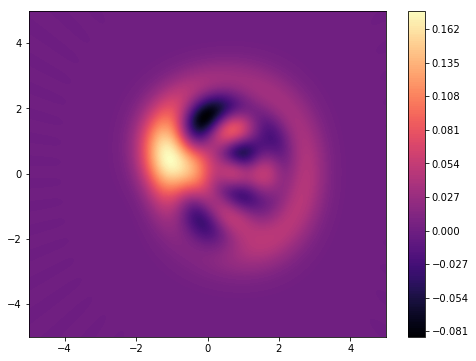

In [15]:
plt.figure(figsize=(8,6))
X,Y = np.meshgrid(xvec,xvec)
plt.contourf(X,Y,W,256,cmap='magma')
plt.colorbar();

## Highlight negative regions

In [25]:
wmap = qt.wigner_cmap(W,shift=-1e-3)  # Generate Wigner colormap

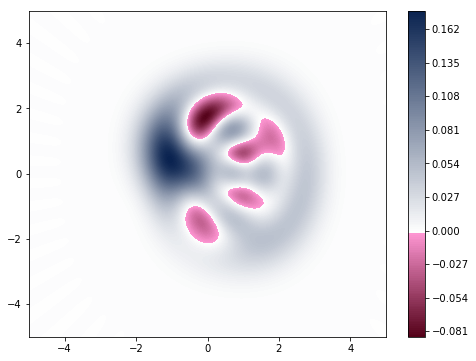

In [26]:
plt.figure(figsize=(8,6))
X,Y = np.meshgrid(xvec,xvec)
plt.contourf(X,Y,W,256,cmap=wmap)
plt.colorbar();